<a href="https://colab.research.google.com/github/abeerfatimaa/ARIMA-for-stock-price-prediction-of-Apple-Inc.-s-/blob/main/ARIMA_for_stock_price_prediction_of_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for clean output

In [ ]:
# Load the data from the csv file
df = pd.read_csv('AAPL.csv')
#display first five rows of the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [ ]:
#This function is imported from the `statsmodels.tsa.stattools` module.
#It is used to perform the  Augmented Dickey-Fuller (ADF) test,
#which is a common statistical test used to check if a time series is stationary.
from statsmodels.tsa.stattools import adfuller

#This function is imported from the numpy library.
# It is used to take the natural logarithm of values, which can help stabilize
# the variance of a time series.
from numpy import log

#df.Close.dropna(): This takes the 'Close' column from the DataFrame df and
#drops any NaN (missing) values. This ensures that the ADF test is performed
#on a complete series without any gaps.
result = adfuller(df.Close.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#result[0]: This is the test statistic from the ADF test. It is used to
#determine if the null hypothesis (that the time series has a unit root and
#is non-stationary) can be rejected.
#result[1]: This is the p-value corresponding to the test statistic.
#It helps in deciding whether to reject the null hypothesis.
#A low p-value (typically ≤ 0.05) indicates strong evidence
#against the null hypothesis, suggesting that the time series is stationary.

ADF Statistic: 5.648370
p-value: 1.000000


 The Augmented Dickey-Fuller (ADF) test from the `statsmodels` library is used to assess the stationarity of a time series representing the closing prices of Apple stocks. First, the `adfuller` function is imported to perform the ADF test, which evaluates whether the time series exhibits a unit root and is thus non-stationary. Additionally, the natural logarithm function from `numpy` is imported to stabilize the variance of the time series data. The ADF test is applied to the 'Close' column of a DataFrame (`df`), ensuring any missing values are dropped beforehand to maintain data integrity. The results, including the ADF statistic and corresponding p-value, are printed to determine if the null hypothesis of non-stationarity can be rejected. A low p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that the Apple stock prices exhibit stationary behavior, which is crucial for accurate time series analysis and forecasting.
                                                                                The output of the Augmented Dickey-Fuller (ADF) test for the Apple stock closing prices shows an ADF statistic of 5.648370 and a p-value of 1.000000. These results indicate that the time series is likely non-stationary, as the high p-value suggests insufficient evidence to reject the null hypothesis of a unit root. Therefore, further analysis such as differencing may be needed to achieve stationarity before applying models like ARIMA for accurate forecasting of Apple stock prices.

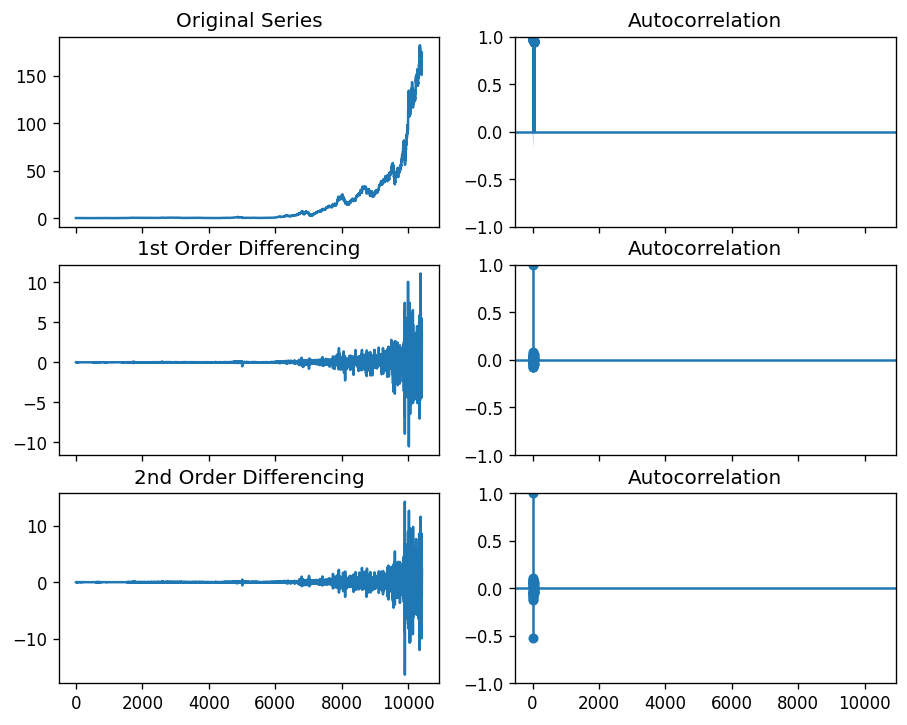

In [ ]:
#Since p-value(1.00) is greater than the significance level(0.05),
#let’s difference the series and see how the autocorrelation plot looks like.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

The `statsmodels` and `matplotlib` libraries libraries are used to visualize the autocorrelation function (ACF) of the Apple stock closing prices (`df.Close`) and its differenced series. First, the figure size and DPI settings for the plots are adjusted for clarity. Subsequently, a 3x2 grid of plots is created using `plt.subplots`, where each row represents a different stage of data transformation.

- **Original Series:** The top-left plot displays the original time series of Apple stock closing prices.
- **ACF Plot (Original Series):** The top-right plot shows the autocorrelation function (ACF) plot for the original series, indicating how each observation correlates with its lagged versions.

- **1st Order Differencing:** The middle-left plot illustrates the first-order differencing of the original series, which removes trends and enhances stationarity.
- **ACF Plot (1st Differencing):** The middle-right plot depicts the ACF of the first differenced series, highlighting significant lag correlations after the first transformation.

- **2nd Order Differencing:** The bottom-left plot demonstrates the second-order differencing, further stabilizing the variance and addressing remaining trends.
- **ACF Plot (2nd Differencing):** Finally, the bottom-right plot displays the ACF of the second differenced series, showing reduced autocorrelation indicative of improved stationarity.

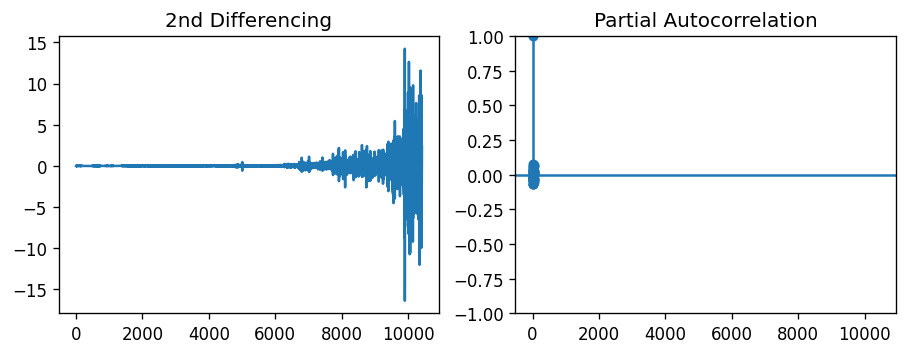

In [ ]:
# PACF plot of 2nd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Close.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Close.diff().dropna(), ax=axes[1])

plt.show()

- **Setting Figure Size and DPI:** The initial line adjusts the figure size to (9, 3) inches and sets the DPI to 120, ensuring the plots are appropriately sized and clear.

- **Subplots Initialization:** Using `plt.subplots(1, 2, sharex=True)`, a figure with 1 row and 2 columns of subplots is initialized. Both subplots share the same x-axis for consistency.

- **Left Subplot - 2nd Differencing:** The left subplot (`axes[0]`) plots the second-order differencing of the first-order differenced series (`df.Close.diff().diff()`). This transformation helps further stabilize the variance and remove trends from the original series.

- **Right Subplot - PACF of 1st Differencing:** The right subplot (`axes[1]`) displays the partial autocorrelation function (PACF) of the first-order differenced series (`df.Close.diff().dropna()`). The PACF helps identify the number of lagged terms to include in the ARIMA model, showing significant autocorrelations beyond simple linear relationships.

- **Adjusting Y-axis Limits:** `axes[1].set(ylim=(0,5))` sets the y-axis limits for the PACF plot, focusing on values between 0 and 5 for better visibility of significant correlations.

- **Displaying the Plots:** Finally, `plt.show()` renders and displays the figure containing both subplots, providing insights into the effectiveness of second differencing and the autocorrelation structure necessary for ARIMA model parameter selection.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Define the ARIMA model (order: p, d, q)
model = ARIMA(df['Close'], order=(1, 2, 2))
model_fit = model.fit()
# Print summary of the model
print(model_fit.summary())
print(model.seasonal_order)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10409
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -9972.568
Date:                Wed, 17 Jul 2024   AIC                          19953.137
Time:                        10:21:49   BIC                          19982.138
Sample:                             0   HQIC                         19962.934
                              - 10409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9975      0.001   -796.497      0.000      -1.000      -0.995
ma.L1         -0.0032      0.002     -2.008      0.045      -0.006   -7.68e-05
ma.L2         -0.9936      0.002   -611.725      0.0

- **Importing ARIMA:** `from statsmodels.tsa.arima.model import ARIMA` imports the ARIMA model class from the `statsmodels` library, which is used for time series analysis and forecasting.

- **Defining the ARIMA Model:** `model = ARIMA(df['Close'], order=(1, 2, 2))` defines an ARIMA model with parameters `(p=1, d=2, q=2)`. Here:
  - `p=1` represents the number of lag observations included in the model (AR part).
  - `d=2` specifies the number of times the original series is differenced to achieve stationarity.
  - `q=2` indicates the size of the moving average window (MA part).

- **Fitting the ARIMA Model:** `model_fit = model.fit()` fits the defined ARIMA model to the Apple stock closing prices (`df['Close']`). The model is trained using the data to estimate its parameters.

- **Printing Model Summary:** `print(model_fit.summary())` prints a summary of the fitted ARIMA model. This summary includes details such as coefficients, standard errors, and statistical metrics like AIC (Akaike Information Criterion), which evaluates the model's goodness of fit.

- **Printing Seasonal Order:** `print(model.seasonal_order)` (if `seasonal_order` is a valid attribute in your version of `statsmodels`) would print the seasonal order parameters of the model, if applicable. This might include seasonal ARIMA (SARIMA) parameters for models with seasonal components.



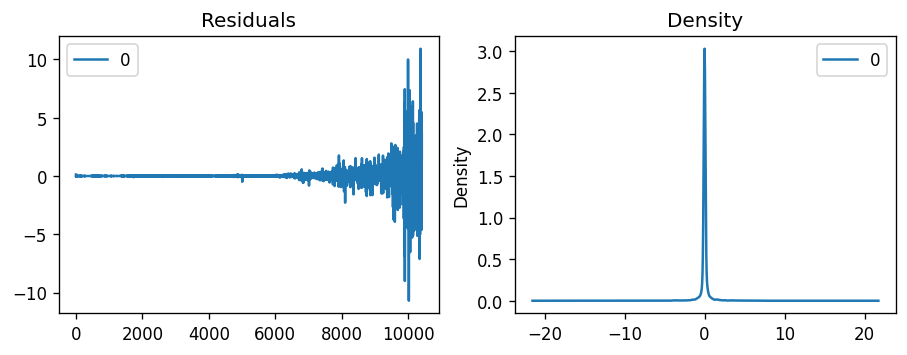

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


After fitting an ARIMA model to the Apple stock closing prices using `statsmodels`, analyzing residuals is essential to evaluate the model's performance. Residuals represent the differences between observed and predicted values, offering insights into how well the model captures underlying patterns in the data. Plotting residuals over time helps assess their randomness and stability; ideally, residuals should exhibit random fluctuations around zero, indicating that the model adequately explains the data's variability. Additionally, plotting the density of residuals via kernel density estimation (KDE) provides a visual check for their distribution. Normally distributed residuals suggest that the model assumptions, such as constant variance and independence of errors, are likely met.


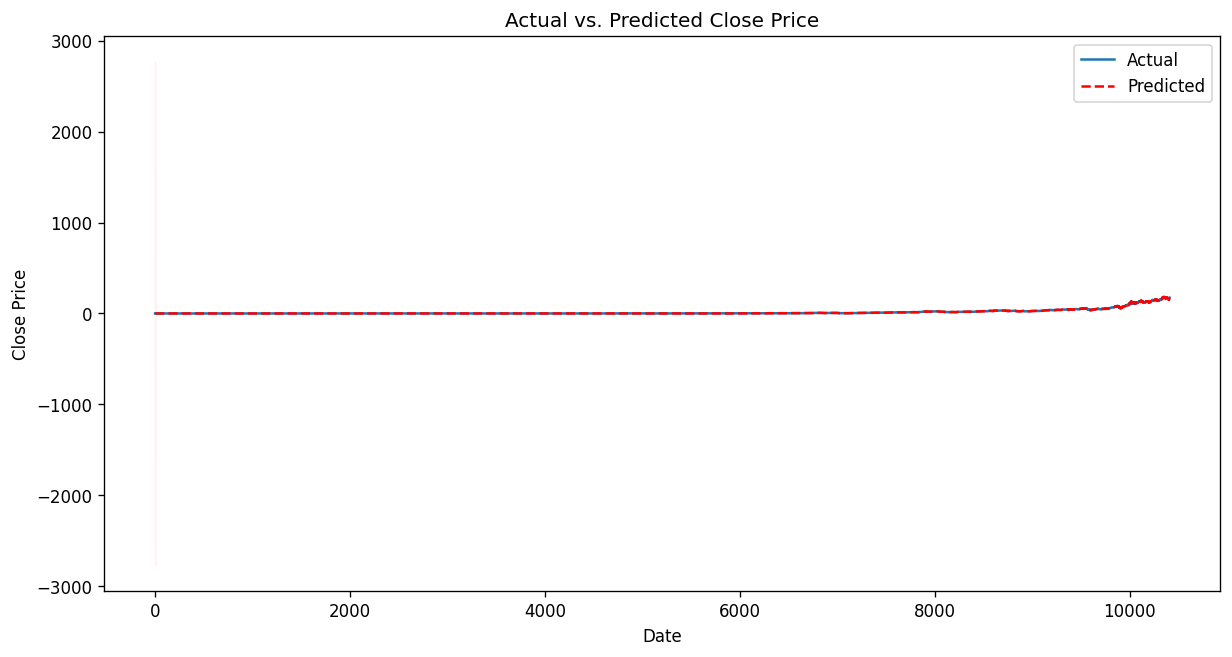

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

# Plot actual vs. predicted
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the actual data
ax.plot(df.index, df['Close'], label='Actual')

# Get predictions
pred_start = model_fit.fittedvalues.index[0]
pred_end = model_fit.fittedvalues.index[-1]
predictions = model_fit.get_prediction(start=pred_start, end=pred_end)

# Plot predicted values
predicted_mean = predictions.predicted_mean
ax.plot(df.index, predicted_mean, color='red', linestyle='--', label='Predicted')

# Fill confidence interval
ci = predictions.conf_int(alpha=0.05)
ax.fill_between(df.index, ci['lower Close'], ci['upper Close'], color='pink', alpha=0.2)

# Set plot labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Actual vs. Predicted Close Price')
ax.legend()

plt.show()
